# **A. Data Ingestion**
Data ingestion adalah proses mengambil data dari suatu source. Pada tahap ini data telah diambil dan dihimpun menggunakan ```Google Form```. Sebelum menampilkan data kita panggil library yang dibutuhkan terlebih dahulu.
## **1. Memanggil Library**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## **2. Load Data dan Read Data**

In [9]:
from google.colab import files
files.upload()

Saving residensial_data.csv to residensial_data (1).csv


{'residensial_data.csv': b'Timestamp;Nama Perumahan ;Nama Desa Perumahan;Nama Kecamatan Perumahan;Nama Kabupaten / Kota Perumahan;fas_olga;fas_keamanan;jrk_airpport;jrk_toll;jrk_transport;jrk_supermarket;house_model;luas_rumah;uk_rumah;hrg_beli\r\n4/10/2022 5:13:11;Grand Depok City Sektor Melati;Jatimulya;CIlodong;Depok;1;1;31;8;10;2;3;84;60;700000000\r\n4/10/2022 12:32:40;puri nirwana 1;pabuaran;cibinong;bogor;1;1;33;10;7;3;2;100;90;1000000000\r\n4/11/2022 18:32:14;puri nirwana 1;puri;cibinong;bogor;1;1;39;9;8;2;2;110;72;1200000000\r\n4/13/2022 8:19:58;Perumahan Bumi Cibinong Endah;Sukahati;Cibinong;Kabupaten Bogor;1;1;36;10;8;3;2;90;72;800000000\r\n4/15/2022 9:12:47;Puri Nirwana 2;Harapan Jaya;Cibinong;Bogor;1;1;40;11;11;4;2;72;60;600000000\r\n4/15/2022 9:17:53;Puri Nirwana 3;Karadenan;Cibinong;Bogor;1;1;35;14;9;1;3;77;60;650000000\r\n4/15/2022 9:25:16;Puri Nirwana 4;Cikaret;Cibinong;Bogor;1;1;39;4;8;3;2;60;50;350000000\r\n4/15/2022 9:28:54;Puri Nirwana 5;Pabuaran;Cirimekar;Cibinong;

In [250]:
import pandas as pd

df = pd.read_csv('residensial_data.csv', sep=';')
df = df.iloc[:,5:]

In [251]:
##cek duplikat data
df.duplicated().sum()

0

In [252]:
#mengecekd data kosong
df.isnull().sum()

fas_olga           0
fas_keamanan       0
jrk_airpport       0
jrk_toll           0
jrk_transport      0
jrk_supermarket    0
house_model        0
luas_rumah         0
uk_rumah           0
hrg_beli           0
dtype: int64

In [253]:
df

,fas_olga,fas_keamanan,jrk_airpport,jrk_toll,jrk_transport,jrk_supermarket,house_model,luas_rumah,uk_rumah,hrg_beli
0,1,1,31,8,10,2,3,84,60,700000000
1,1,1,33,10,7,3,2,100,90,1000000000
2,1,1,39,9,8,2,2,110,72,1200000000
3,1,1,36,10,8,3,2,90,72,800000000
4,1,1,40,11,11,4,2,72,60,600000000
...,...,...,...,...,...,...,...,...,...,...
295,1,1,311,10,8,2,1,88,70,840000000
296,1,1,32,9,10,3,3,100,90,1100000000
297,1,1,28,7,8,4,3,110,110,1250000000
298,1,1,29,9,11,3,3,70,36,683000000


In [254]:
df.isnull().sum().sum()

0

# **B. Data Exploration**

Setelah kita mendapatkan data yang akan kita olah, sekarang kita akan melihat bagaimana karakteristik data yang kita punya. Kita bisa melakukan banyak hal, namun pada kesempatan kali ini data iris akan dilihat :

1.   isi data paling atas menggunakan perintah head()
2.   Isi data paling bawah menggunakan perintah tail()
3.   Melihat jumlah kolom dan baris menggunakan shape()
4.   melihat variables yang ada menggunakan perintah keys()
5. menampilkan gambaran data mulai dari jumlah data per kolom, tipe data per kolom, dan jumlah keseluruhan data menggunakan info()
6. melihat statistika deskriptif menggunakan describe()







##**1. head() and tail()**

In [255]:
df.head()

,fas_olga,fas_keamanan,jrk_airpport,jrk_toll,jrk_transport,jrk_supermarket,house_model,luas_rumah,uk_rumah,hrg_beli
0,1,1,31,8,10,2,3,84,60,700000000
1,1,1,33,10,7,3,2,100,90,1000000000
2,1,1,39,9,8,2,2,110,72,1200000000
3,1,1,36,10,8,3,2,90,72,800000000
4,1,1,40,11,11,4,2,72,60,600000000


In [256]:
df.tail()

,fas_olga,fas_keamanan,jrk_airpport,jrk_toll,jrk_transport,jrk_supermarket,house_model,luas_rumah,uk_rumah,hrg_beli
295,1,1,311,10,8,2,1,88,70,840000000
296,1,1,32,9,10,3,3,100,90,1100000000
297,1,1,28,7,8,4,3,110,110,1250000000
298,1,1,29,9,11,3,3,70,36,683000000
299,2,1,30,10,7,1,3,72,50,710000000


## **2. shape() and keys()**

In [257]:
df.shape

(300, 10)

In [258]:
df.keys()

Index(['fas_olga', 'fas_keamanan', 'jrk_airpport', 'jrk_toll', 'jrk_transport',
       'jrk_supermarket', 'house_model', 'luas_rumah', 'uk_rumah', 'hrg_beli'],
      dtype='object')

## **3. info() and describe()**

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   fas_olga         300 non-null    int64
 1   fas_keamanan     300 non-null    int64
 2   jrk_airpport     300 non-null    int64
 3   jrk_toll         300 non-null    int64
 4   jrk_transport    300 non-null    int64
 5   jrk_supermarket  300 non-null    int64
 6   house_model      300 non-null    int64
 7   luas_rumah       300 non-null    int64
 8   uk_rumah         300 non-null    int64
 9   hrg_beli         300 non-null    int64
dtypes: int64(10)
memory usage: 23.6 KB


In [260]:
df.describe()

,fas_olga,fas_keamanan,jrk_airpport,jrk_toll,jrk_transport,jrk_supermarket,house_model,luas_rumah,uk_rumah,hrg_beli
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,1.310000,1.160000,41.210000,13.210000,8.806667,2.500000,2.403333,75.906667,62.610000,6.228554e+08
std,0.463266,0.367219,42.415045,8.323672,2.106517,0.786593,0.922039,14.161678,18.608569,3.187425e+08
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,55.000000,30.000000,2.290000e+08
25%,1.000000,1.000000,32.000000,9.000000,8.000000,2.000000,2.000000,66.000000,50.000000,3.900000e+08
50%,1.000000,1.000000,34.000000,11.000000,9.000000,3.000000,2.000000,72.000000,60.000000,5.495000e+08
75%,2.000000,1.000000,40.000000,18.000000,10.000000,3.000000,3.000000,80.000000,72.000000,7.600000e+08
max,2.000000,2.000000,354.000000,124.000000,16.000000,4.000000,4.000000,120.000000,110.000000,2.300000e+09


# **D. Preprocessing**
## **1. Konversi Data ke Array**

In [261]:
df.isnull().sum()

fas_olga           0
fas_keamanan       0
jrk_airpport       0
jrk_toll           0
jrk_transport      0
jrk_supermarket    0
house_model        0
luas_rumah         0
uk_rumah           0
hrg_beli           0
dtype: int64

In [262]:
#praproses
X = df.values
X

array([[         1,          1,         31, ...,         84,         60,
         700000000],
       [         1,          1,         33, ...,        100,         90,
        1000000000],
       [         1,          1,         39, ...,        110,         72,
        1200000000],
       ...,
       [         1,          1,         28, ...,        110,        110,
        1250000000],
       [         1,          1,         29, ...,         70,         36,
         683000000],
       [         2,          1,         30, ...,         72,         50,
         710000000]])

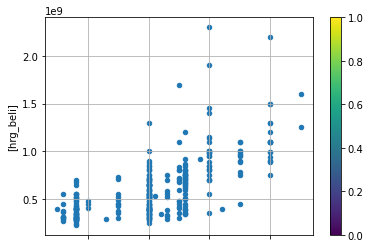

In [263]:
import matplotlib.pyplot as plt

df.plot(kind="scatter", x=["uk_rumah"], y=["hrg_beli"], colorbar=True)
plt.grid()

## **2. Menskalakan Data / Menstandarkan Data**

In [264]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X =scaler .fit_transform(X)
X

array([[0.        , 0.        , 0.07977208, ..., 0.44615385, 0.375     ,
        0.22742636],
       [0.        , 0.        , 0.08547009, ..., 0.69230769, 0.75      ,
        0.37228392],
       [0.        , 0.        , 0.1025641 , ..., 0.84615385, 0.525     ,
        0.46885563],
       ...,
       [0.        , 0.        , 0.07122507, ..., 0.84615385, 1.        ,
        0.49299855],
       [0.        , 0.        , 0.07407407, ..., 0.23076923, 0.075     ,
        0.21921777],
       [1.        , 0.        , 0.07692308, ..., 0.26153846, 0.25      ,
        0.23225495]])

In [265]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
df = pd.DataFrame(X, columns=['fas_olga', 'fas_keamanan', 'jrk_airport', 'jrk_toll', 'jrk_transport',
       'jrk_supermarket', 'house_model', 'luas_rumah', 'uk_rumah', 'hrg_beli'])

In [268]:
df

,fas_olga,fas_keamanan,jrk_airport,jrk_toll,jrk_transport,jrk_supermarket,house_model,luas_rumah,uk_rumah,hrg_beli
0,0.0,0.0,0.079772,0.056911,0.600000,0.333333,0.666667,0.446154,0.375,0.227426
1,0.0,0.0,0.085470,0.073171,0.400000,0.666667,0.333333,0.692308,0.750,0.372284
2,0.0,0.0,0.102564,0.065041,0.466667,0.333333,0.333333,0.846154,0.525,0.468856
3,0.0,0.0,0.094017,0.073171,0.466667,0.666667,0.333333,0.538462,0.525,0.275712
4,0.0,0.0,0.105413,0.081301,0.666667,1.000000,0.333333,0.261538,0.375,0.179141
...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.877493,0.073171,0.466667,0.333333,0.000000,0.507692,0.500,0.295027
296,0.0,0.0,0.082621,0.065041,0.600000,0.666667,0.666667,0.692308,0.750,0.420570
297,0.0,0.0,0.071225,0.048780,0.466667,1.000000,0.666667,0.846154,1.000,0.492999
298,0.0,0.0,0.074074,0.065041,0.666667,0.666667,0.666667,0.230769,0.075,0.219218


# **Proses Data mining**


# 1. KMeans

In [318]:
kmeans_model = KMeans(n_clusters=2, random_state=42).fit_predict(X)
print(kmeans_model)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1]


In [319]:
##Save to data
labels_kmeans = pd.DataFrame(kmeans_model)
df['Cluster_Kmeans'] = labels_kmeans

## 2. Fuzzy C-Means

In [274]:
import numpy as np
from fcmeans import FCM

In [279]:
fcm_model = FCM(n_clusters=2, max_iter=1000)
fcm_model.fit(X)
labels_fcm = fcm_model.predict(X)
centers_Fcm = fcm_model.centers

In [280]:
print(centers)

[[-3.88578059e-16  5.79710145e-02  1.05729661e-01  9.73645968e-02
   5.19484702e-01  4.92753623e-01  4.76650564e-01  3.43515422e-01
   4.29951691e-01  2.04446544e-01]
 [ 1.00000000e+00  3.87096774e-01  1.15828815e-01  1.03505551e-01
   5.22580645e-01  5.16129032e-01  4.48028674e-01  2.72952854e-01
   3.57930108e-01  1.58413940e-01]]


In [283]:
print(labels_fcm)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1]


In [284]:
##Save to data
labels_fcm = pd.DataFrame(labels_fcm)
df['Cluster_FCM'] = labels_fcm

### **INTERPRETATION / EVALUATION**


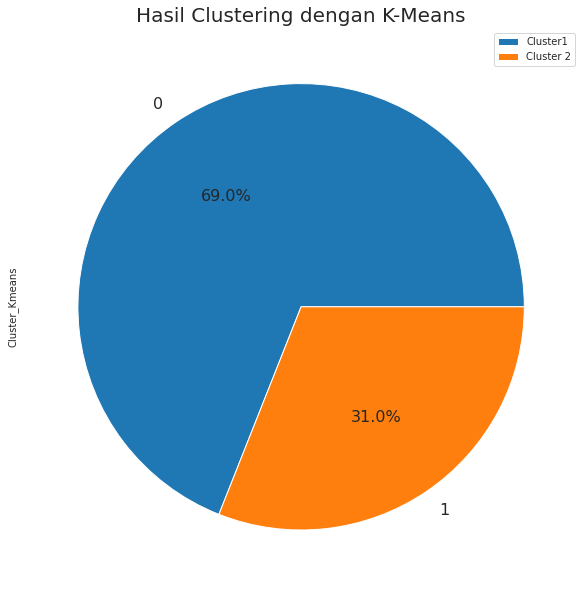

In [312]:
# Banyaknya data per kelas
sns.set_style("whitegrid")
counts = df["Cluster_Kmeans"].value_counts()

counts.plot.pie(figsize=(10,20), autopct='%.1f%%', fontsize = 16)
plt.title("Hasil Clustering dengan K-Means", fontsize = 20)
plt.legend(['Cluster1', 'Cluster 2'])
# Show plot
plt.show()

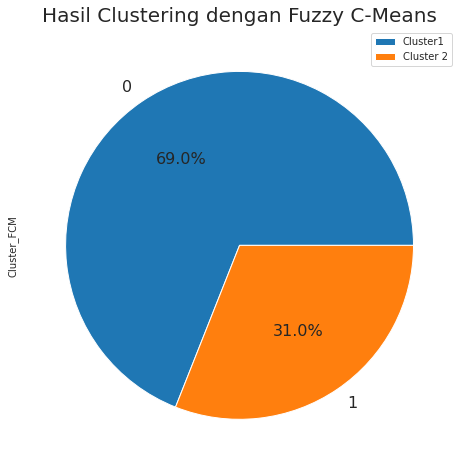

In [311]:
# Banyaknya data per kelas
sns.set_style('ticks')
counts = df["Cluster_FCM"].value_counts()

counts.plot.pie(figsize=(10,8), autopct='%.1f%%', fontsize = 16)
plt.title("Hasil Clustering dengan Fuzzy C-Means", fontsize = 20)
plt.legend(['Cluster1', 'Cluster 2'])
# Show plot
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3866678384515078


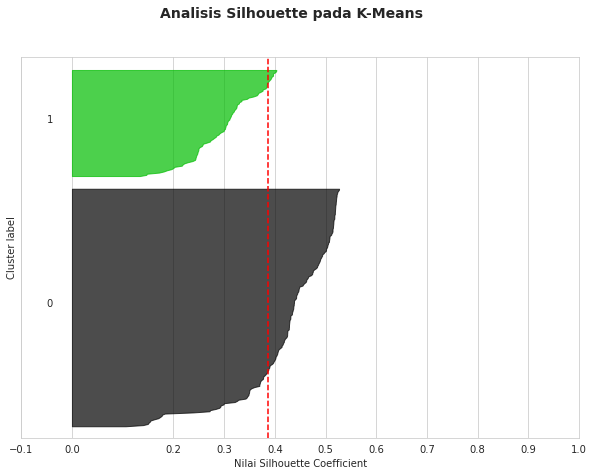

In [320]:
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("Nilai Silhouette Coefficient")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1])

    plt.suptitle(("Analisis Silhouette pada K-Means"),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3866678384515078


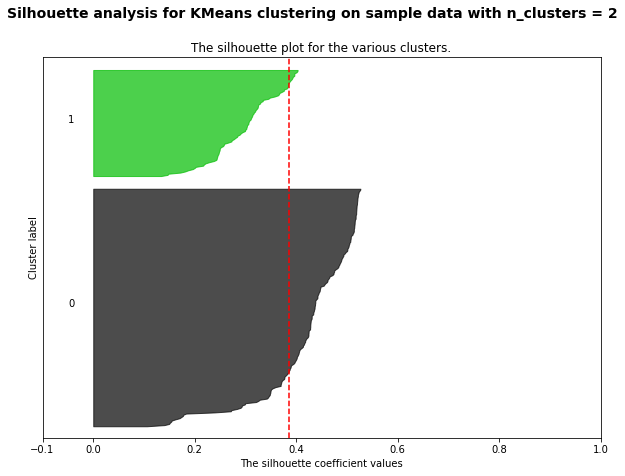

In [245]:
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3866678384515078


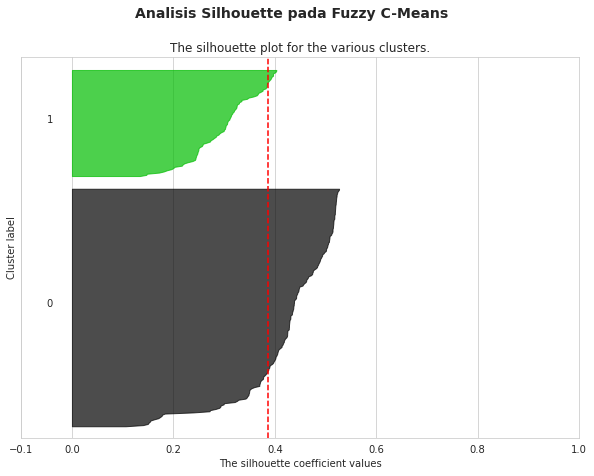

In [321]:
range_n_clusters = [2]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    fcm_model = FCM(n_clusters=n_clusters, max_iter=1000)
    fcm_model.fit(X)
    labels = fcm_model.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = fcm_model.centers
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Analisis Silhouette pada Fuzzy C-Means"),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.3866678384515078
For n_clusters = 3 The average silhouette_score is : 0.3866678384515078
For n_clusters = 4 The average silhouette_score is : 0.3866678384515078
For n_clusters = 5 The average silhouette_score is : 0.3866678384515078
For n_clusters = 6 The average silhouette_score is : 0.3866678384515078
For n_clusters = 7 The average silhouette_score is : 0.3866678384515078
For n_clusters = 8 The average silhouette_score is : 0.3866678384515078
For n_clusters = 9 The average silhouette_score is : 0.3866678384515078
For n_clusters = 10 The average silhouette_score is : 0.3866678384515078


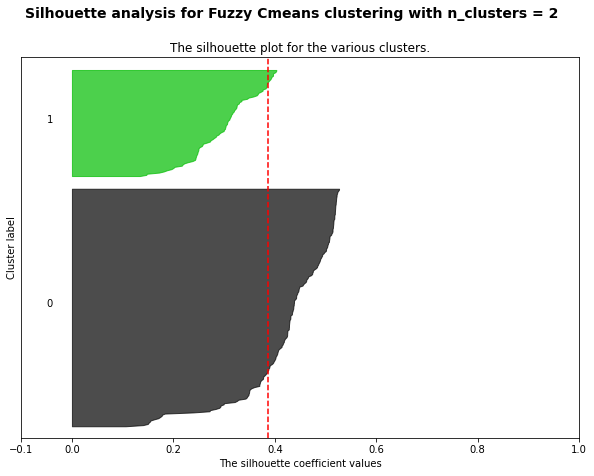

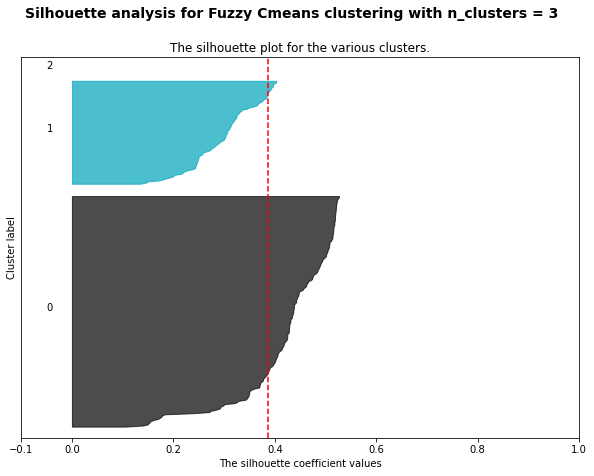

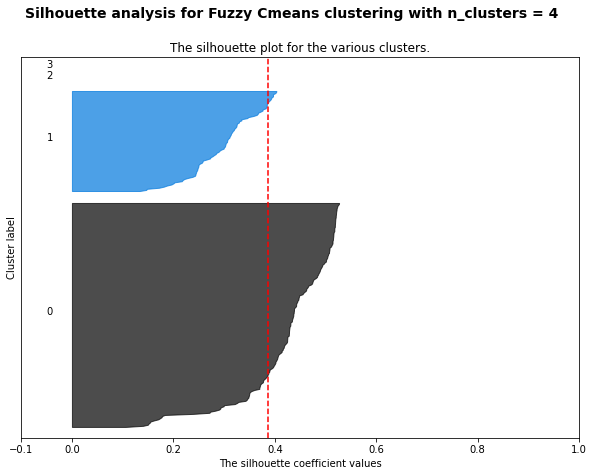

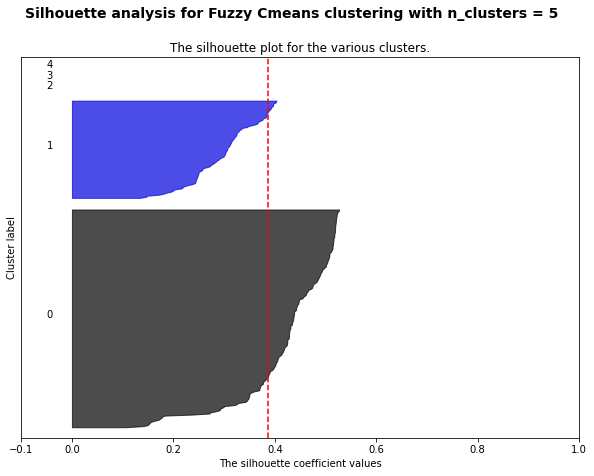

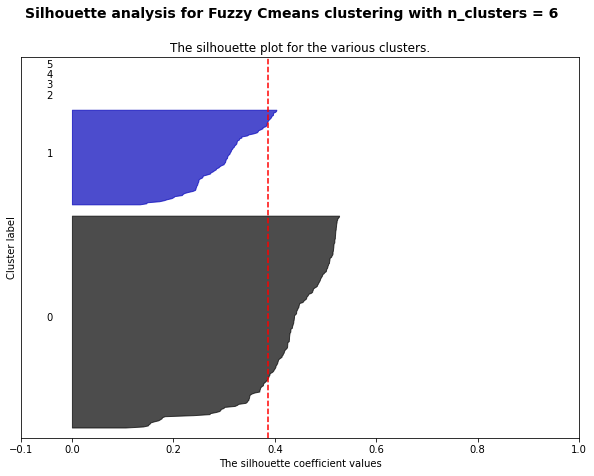

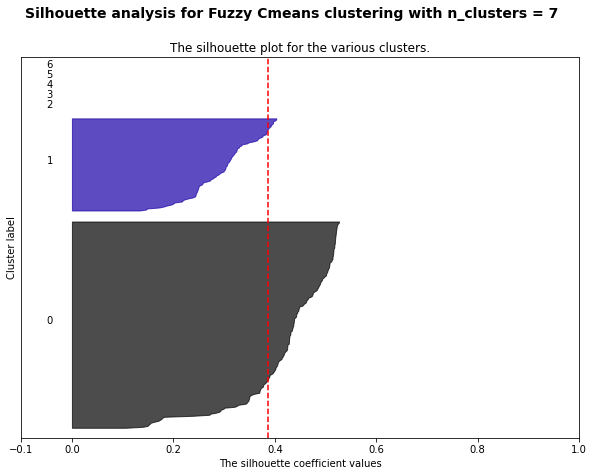

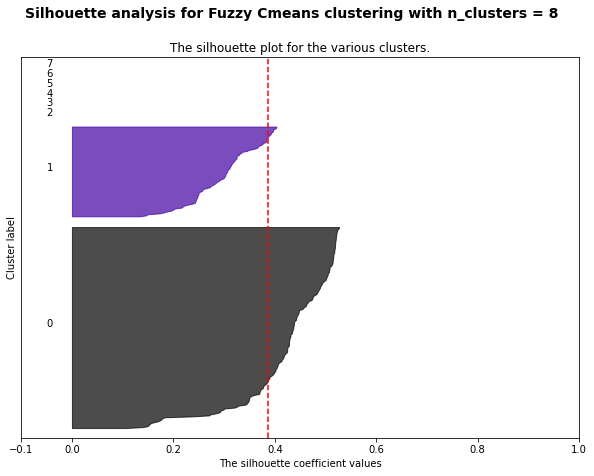

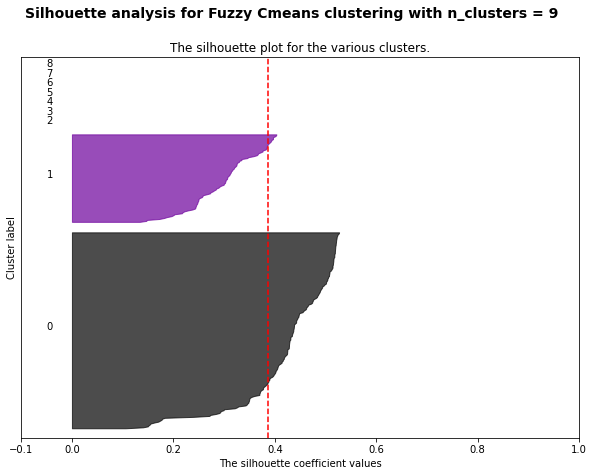

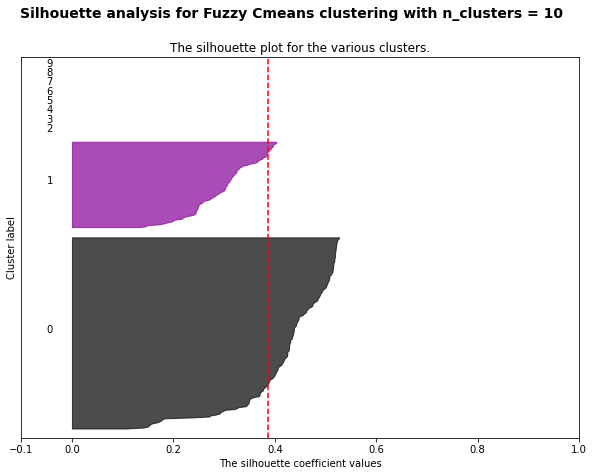

In [235]:
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    fcm_model = FCM(n_clusters=n_clusters, max_iter=1000)
    fcm_model.fit(X)
    labels = fcm_model.predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # # 2nd Plot showing the actual clusters formed
    # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
    #             c=colors, edgecolor='k')

    # # Labeling the clusters
    # centers = fcm_model.centers
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    # ax2.set_title("The visualization of the clustered data.")
    # ax2.set_xlabel("Feature space for the 1st feature")
    # ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Fuzzy Cmeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from fcmeans import FCM

For n_clusters = 2 The average silhouette_score is : 0.3866678384515078
For n_clusters = 3 The average silhouette_score is : 0.3929509983804994
For n_clusters = 4 The average silhouette_score is : 0.3176579499205072
For n_clusters = 5 The average silhouette_score is : 0.3424021665440252
For n_clusters = 6 The average silhouette_score is : 0.2830149767108205


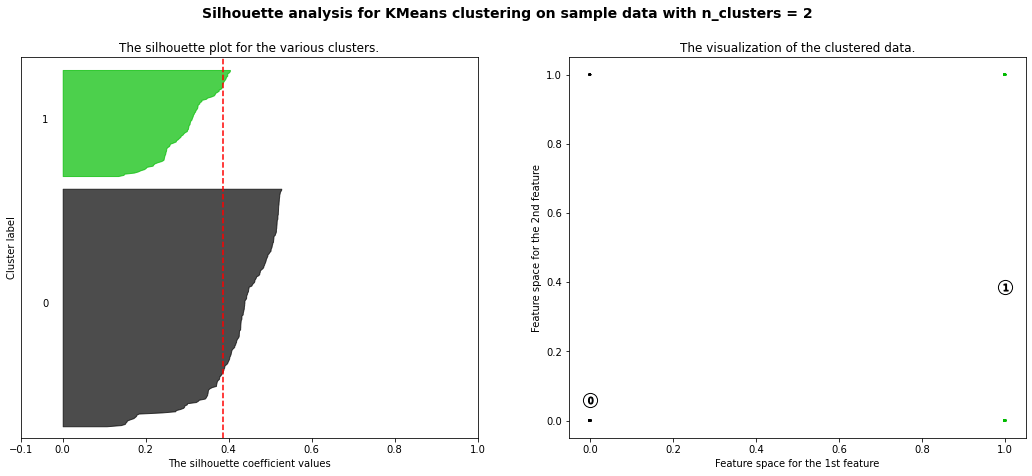

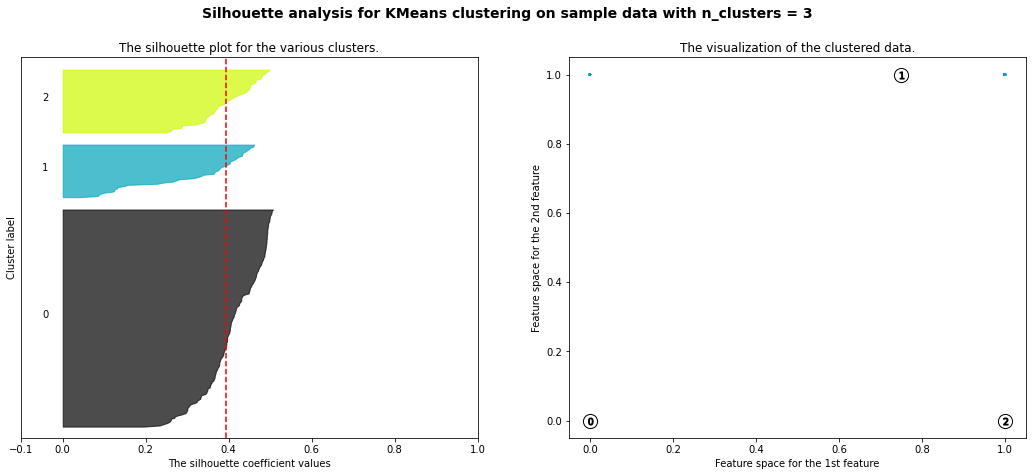

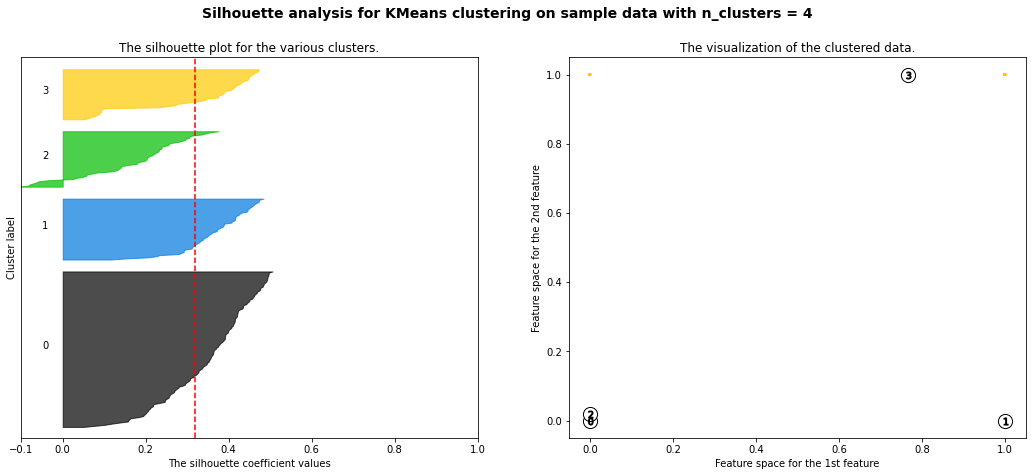

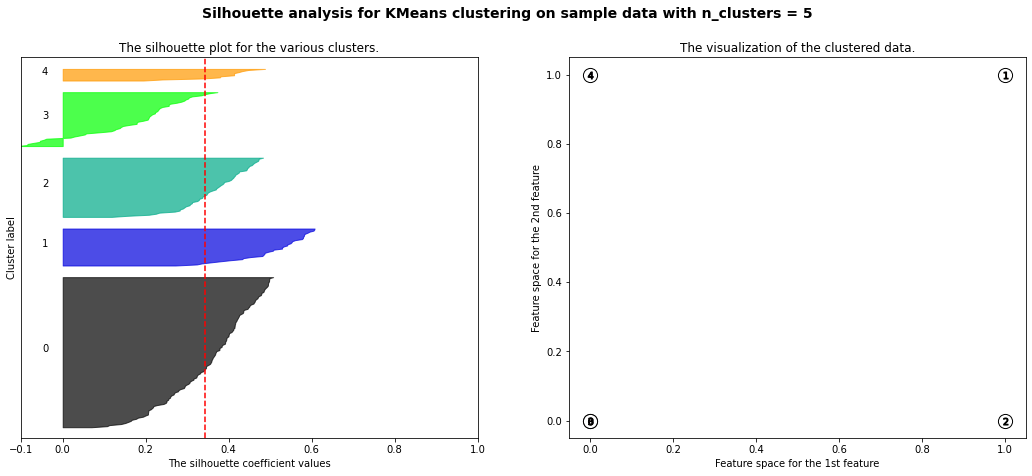

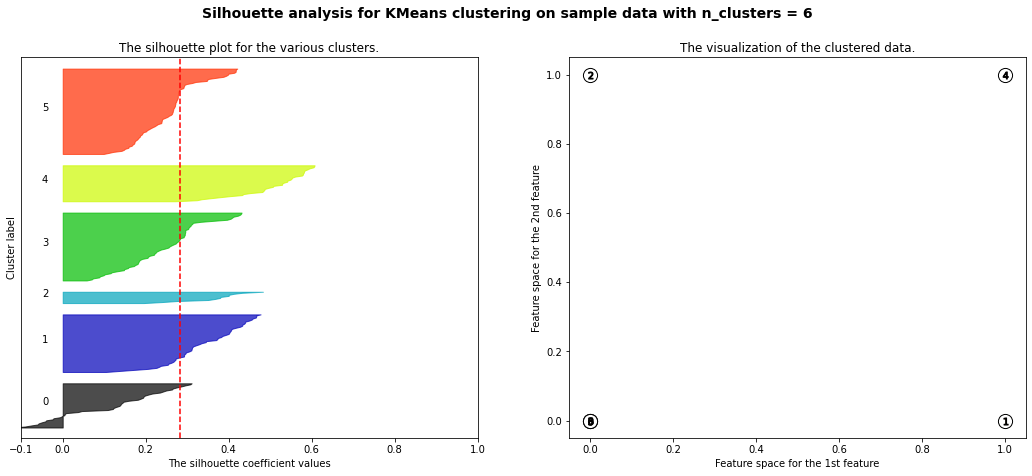

In [25]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

ReferenceError: ignored

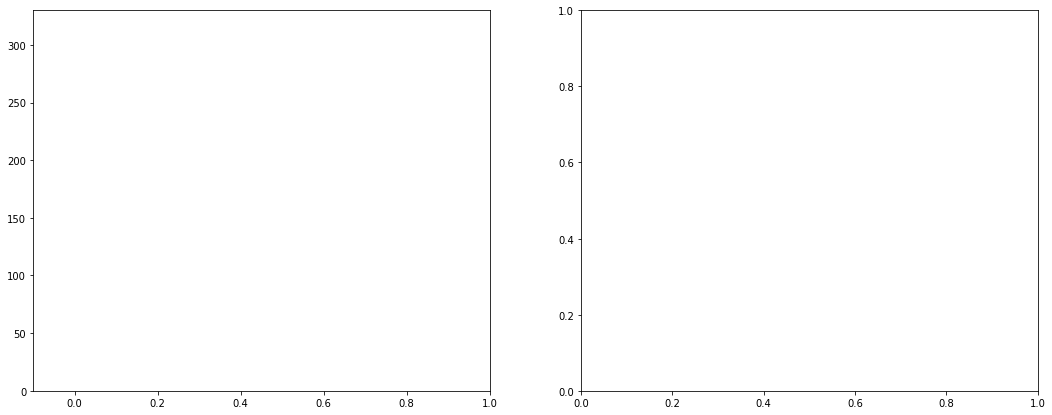

In [223]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    fcm_model = FCM(n_clusters=2, max_iter=1000)
    labels = fcm_model.predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.centers
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(df)
print(kmeans)

KMeans(n_clusters=2, random_state=123)


In [ ]:
print(kmeans.cluster_centers_)

[[1.34529148e+00 1.19730942e+00 4.08026906e+01 1.35156951e+01
  9.05829596e+00 2.52017937e+00 2.30941704e+00 6.98071749e+01
  5.59192825e+01 4.79608161e+08 1.36322870e+00]
 [1.20833333e+00 1.04166667e+00 4.28888889e+01 1.25000000e+01
  7.97222222e+00 2.44444444e+00 2.66666667e+00 9.41250000e+01
  8.30972222e+01 1.05602778e+09 7.36111111e-01]]


In [ ]:
import numpy as np

print(np.unique(kmeans.labels_))

[0 1]


In [ ]:
labels = pd.DataFrame(kmeans.labels_)
df['Cluster'] = kmeans.labels_

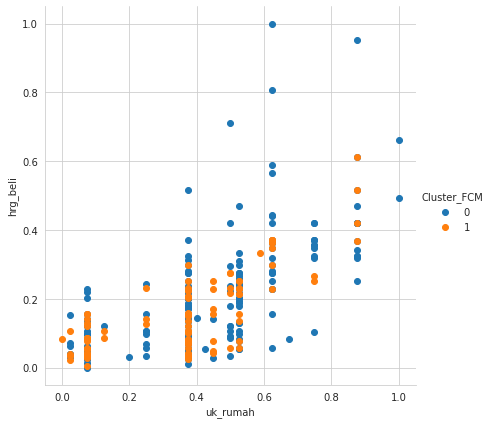

In [316]:
import seaborn as sns
sns.FacetGrid(df, hue='Cluster_FCM', height = 6).map(plt.scatter, 'uk_rumah','hrg_beli').add_legend()

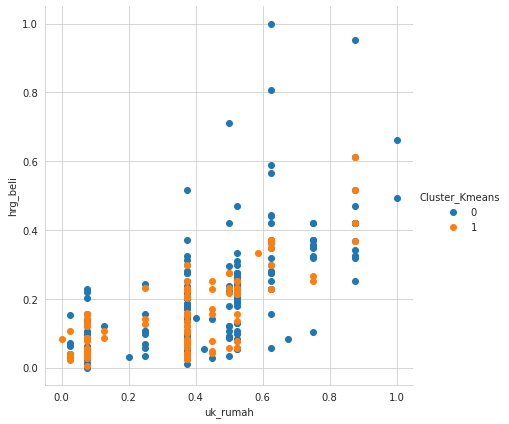

In [317]:
sns.FacetGrid(df, hue='Cluster_Kmeans', height = 6).map(plt.scatter, 'uk_rumah','hrg_beli').add_legend()

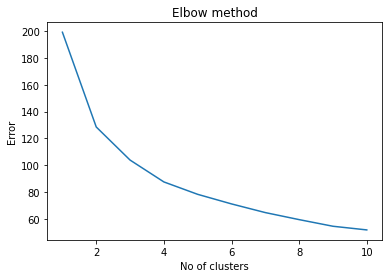

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df_scaled)
    kmeans.fit(df_scaled)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
db_index = davies_bouldin_score(df.values, kmeans.labels_)
print(db_index)

0.5956441244020254
